# Predicting Confirmed Cases

In [ ]:
import numpy as np
import pandas as pd

In [2]:
data_train=pd.read_csv("//home/tharun/Downloads/07-12-2020.csv")
data_train.shape

(58, 18)

In [3]:
data_train.shape

(58, 18)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   37 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [5]:
data_train.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956
5,California,US,2020-07-13 04:43:16,36.1162,-119.6816,324543,7051,NaN,317492.0,6,821.373680,5406599.0,NaN,2.172593,84000006,USA,13683.358185,NaN
6,Colorado,US,2020-07-13 04:43:16,39.0598,-105.3111,36895,1725,4749.0,30421.0,8,640.678788,392103.0,5885.0,4.675430,84000008,USA,6808.837912,15.950671
7,Connecticut,US,2020-07-13 04:43:16,41.5978,-72.7554,47287,4348,8351.0,34588.0,9,1326.316787,558209.0,10552.0,9.194916,84000009,USA,15656.776018,22.314801
8,Delaware,US,2020-07-13 04:43:16,39.3185,-75.5071,12804,517,7120.0,5167.0,10,1314.897655,137409.0,NaN,4.037801,84000010,USA,14111.119327,NaN
9,Diamond Princess,US,2020-07-13 04:43:16,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [6]:
type('Province_State')

str

In [7]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()
for column in data_train.columns:
    if type(column) == str:
        data_train[column] = Lb.fit_transform(data_train[column])
    else:
        data_train = data_train


In [8]:
data_train['Province_State'] = data_train['Province_State'] * data_train['Confirmed']


In [9]:
data_train = pd.get_dummies(data=data_train)

In [10]:
data_train.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,9,28,39,34,33,40,0,38,33,26,22,5,4,24,27
1,8,0,0,55,2,8,5,3,12,1,6,15,42,5,6,4,53,41
2,0,0,0,0,0,0,0,55,0,51,0,0,44,57,0,0,0,43
3,153,0,0,12,9,51,41,26,50,2,53,39,24,18,7,4,17,1
4,116,0,0,15,22,29,20,31,20,3,37,25,12,4,8,4,37,6
5,280,0,0,19,5,56,52,53,57,4,30,55,56,25,9,4,41,45
6,204,0,0,27,13,34,39,17,44,5,22,26,25,44,10,4,3,34
7,259,0,0,37,46,37,49,24,45,6,48,34,30,56,11,4,45,35
8,160,0,0,29,43,20,23,23,19,7,47,14,51,39,12,4,43,47
9,18,0,0,57,56,2,0,52,2,56,56,56,57,0,56,4,57,50


In [11]:
data_train.describe()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.0,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,802.965517,0.0,0.0,28.500000,28.500000,28.500000,27.517241,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,3.844828,28.500000,28.500000
std,682.659761,0.0,0.0,16.886879,16.886879,16.886879,16.857755,16.886879,16.886879,16.886879,16.886879,16.886879,16.886879,16.886879,16.886879,0.720665,16.886879,16.886879
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,0.0,0.0,14.250000,14.250000,14.250000,13.250000,14.250000,14.250000,14.250000,14.250000,14.250000,14.250000,14.250000,14.250000,4.000000,14.250000,14.250000
50%,672.000000,0.0,0.0,28.500000,28.500000,28.500000,27.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,4.000000,28.500000,28.500000
75%,1048.250000,0.0,0.0,42.750000,42.750000,42.750000,41.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,4.000000,42.750000,42.750000
max,2646.000000,0.0,0.0,57.000000,57.000000,57.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.000000,57.000000,57.000000


In [12]:
X_train = data_train.iloc[:,:-1].values

In [13]:
y_train = data_train.iloc[:, -1:].values

In [14]:
data_train.shape

(58, 18)

In [15]:
data_test = pd.read_csv("//home/tharun/Downloads/07-12-2020.csv")
data_test.shape

(58, 18)

In [16]:
data_test.shape


(58, 18)

In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   37 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [18]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()
for column in data_test:
    if type(column) == str:
        data_test[column] = Lb.fit_transform(data_test[column])
    else:
        data_test = data_test

In [20]:
data_test['Province_State'] = data_test['Province_State'] * data_test['Confirmed']

In [21]:
data_test = pd.get_dummies(data=data_test)

In [28]:
data_test.head(3)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,9,28,39,34,33,40,0,38,33,26,22,5,4,24,27
1,8,0,0,55,2,8,5,3,12,1,6,15,42,5,6,4,53,41
2,0,0,0,0,0,0,0,55,0,51,0,0,44,57,0,0,0,43


In [29]:
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

In [30]:
X_test.shape, y_test.shape

((58, 17), (58,))

In [31]:
import seaborn as sns

<AxesSubplot:>

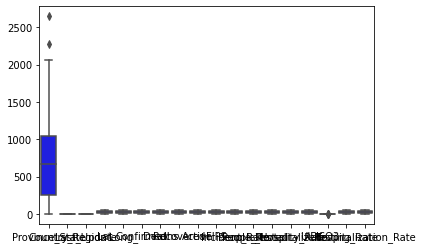

In [32]:
sns.boxplot(data = data_train, color = 'b')
#To plot the graph for the given data to be tarined.

<AxesSubplot:>

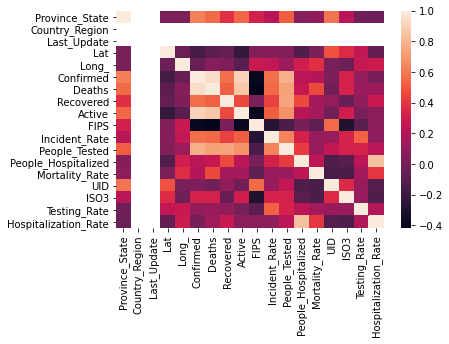

In [33]:
sns.heatmap(data_train.corr())
#To find the co-realation between the columns.

<AxesSubplot:>

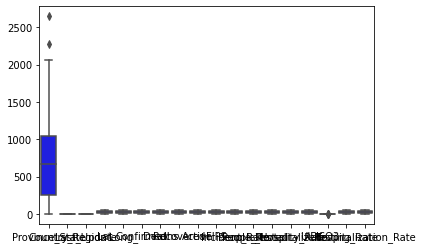

In [34]:
sns.boxplot(data = data_test, color = 'b')
#To plot the graph for the given data to be tested.

<AxesSubplot:>

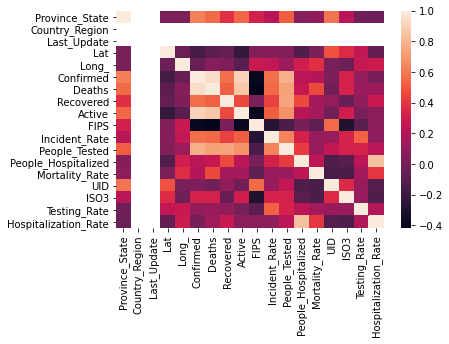

In [35]:
sns.heatmap(data_test.corr())
#To find the co-realation between the columns.

In [36]:
data_train.corr()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,NaN,NaN,0.028608,0.026109,0.619487,0.557145,0.384746,0.540722,0.319816,0.225941,0.519577,0.061043,0.094481,0.586747,0.229749,-0.017873,-0.029385
Country_Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,0.028608,NaN,NaN,1.000000,-0.027162,-0.154819,-0.078945,-0.049863,-0.218493,0.049186,0.062598,0.050724,-0.121043,0.025808,0.488449,0.361119,0.255652,-0.057369
Long_,0.026109,NaN,NaN,-0.027162,1.000000,-0.040943,0.065264,0.047033,-0.088868,0.285367,0.252392,0.133102,0.305300,0.379741,0.021809,-0.020903,0.278538,0.295211
Confirmed,0.619487,NaN,NaN,-0.154819,-0.040943,1.000000,0.949560,0.569042,0.903104,-0.385278,0.568858,0.779876,0.235289,0.214002,0.032083,0.327962,0.103079,0.016826
Deaths,0.557145,NaN,NaN,-0.078945,0.065264,0.949560,1.000000,0.527225,0.866054,-0.417713,0.556683,0.728994,0.271840,0.458202,-0.005916,0.325864,0.129911,0.139587
Recovered,0.384746,NaN,NaN,-0.049863,0.047033,0.569042,0.527225,1.000000,0.457750,0.020025,0.431850,0.740503,0.459411,0.161340,0.104679,-0.035319,0.092928,0.280630
Active,0.540722,NaN,NaN,-0.218493,-0.088868,0.903104,0.866054,0.457750,1.000000,-0.382079,0.521179,0.682672,0.233258,0.168846,-0.002922,0.309221,0.019287,0.070042
FIPS,0.319816,NaN,NaN,0.049186,0.285367,-0.385278,-0.417713,0.020025,-0.382079,1.000000,-0.274601,-0.131441,0.010674,-0.064813,0.560737,-0.300572,-0.075087,0.080316


In [37]:
data_test.corr()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,NaN,NaN,0.028608,0.026109,0.619487,0.557145,0.384746,0.540722,0.319816,0.225941,0.519577,0.061043,0.094481,0.586747,0.229749,-0.017873,-0.029385
Country_Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,0.028608,NaN,NaN,1.000000,-0.027162,-0.154819,-0.078945,-0.049863,-0.218493,0.049186,0.062598,0.050724,-0.121043,0.025808,0.488449,0.361119,0.255652,-0.057369
Long_,0.026109,NaN,NaN,-0.027162,1.000000,-0.040943,0.065264,0.047033,-0.088868,0.285367,0.252392,0.133102,0.305300,0.379741,0.021809,-0.020903,0.278538,0.295211
Confirmed,0.619487,NaN,NaN,-0.154819,-0.040943,1.000000,0.949560,0.569042,0.903104,-0.385278,0.568858,0.779876,0.235289,0.214002,0.032083,0.327962,0.103079,0.016826
Deaths,0.557145,NaN,NaN,-0.078945,0.065264,0.949560,1.000000,0.527225,0.866054,-0.417713,0.556683,0.728994,0.271840,0.458202,-0.005916,0.325864,0.129911,0.139587
Recovered,0.384746,NaN,NaN,-0.049863,0.047033,0.569042,0.527225,1.000000,0.457750,0.020025,0.431850,0.740503,0.459411,0.161340,0.104679,-0.035319,0.092928,0.280630
Active,0.540722,NaN,NaN,-0.218493,-0.088868,0.903104,0.866054,0.457750,1.000000,-0.382079,0.521179,0.682672,0.233258,0.168846,-0.002922,0.309221,0.019287,0.070042
FIPS,0.319816,NaN,NaN,0.049186,0.285367,-0.385278,-0.417713,0.020025,-0.382079,1.000000,-0.274601,-0.131441,0.010674,-0.064813,0.560737,-0.300572,-0.075087,0.080316


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <h1>DECISION TREE CLASSIFIER</h1>

In [44]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [45]:
y_pred = Dtc.predict(X_test)

In [57]:
print("missclassification:-", (y_pred != y_test).sum())

missclassification:- 0


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [60]:
accuracy_score(Dtc.predict(X_train), y_train)

1.0

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Accu, Miss = [], []
ith,TAccu = [], []
Err, TErr = [], []
n = int(input("enter the number of the Best max_Depth:->>")) 
for i in range(1, n): #ITERATIONS OF THE DATA
    ith.append(i)
    classifier = DecisionTreeClassifier(max_depth = i)
    classifier.fit(X_train,y_train) #FITTING THE DATA
    y_pred = classifier.predict(X_test) #PREDICTING THE DATA
    Miss.append((y_test != y_pred).sum()) #FINDING MISSCLASSIIFCATION OF THE DATA
    Accu.append(accuracy_score(y_test,y_pred)) #APPENDING THE ACCURACY SCORE OF THE DATA
    TAccu.append(accuracy_score(y_train, classifier.predict(X_train)))#Training accuracy of the data
    error = 1 - (accuracy_score(y_test,y_pred)) #Erroe for the testing accuracy 
    Err.append(error) #Error
    terror = 1 - accuracy_score(y_train, classifier.predict(X_train)) #ERROR for training accuracy
    TErr.append(terror) #Training Error

enter the number of the Best max_Depth:->>4


In [62]:
ma = Accu.index(max(Accu)) #INDEX OF MAX ACCURACY VALUE
mis = Miss[ma] #MISSCLASSIFICATION OF THE INDEX OF THE DATA

In [63]:
print("============================Testing ACCURACIES=====================================================")
print("All accuracies of the data:-", Accu)
print("===========================MissClassification======================================================")
print("All Missclassifion of the data:-", Miss)
print("===========================Ith-Iteration===========================================================")
print("ith values :-", ith)
print("===========================Training Accuracy=======================================================")
print("Training Accuracy of the data:-", TAccu)
print("===========================Testing Error===========================================================")
print("Training Error of the data:-", Err)
print("===========================Training Error==========================================================")
print("Training Accuracy of the data:-", TErr)

============================Testing ACCURACIES=====================================================
All accuracies of the data:- [0.034482758620689655, 0.06896551724137931, 0.06896551724137931]
===========================MissClassification======================================================
All Missclassifion of the data:- [56, 54, 54]
===========================Ith-Iteration===========================================================
ith values :- [1, 2, 3]
===========================Training Accuracy=======================================================
Training Accuracy of the data:- [0.034482758620689655, 0.06896551724137931, 0.06896551724137931]
===========================Testing Error===========================================================
Training Error of the data:- [0.9655172413793104, 0.9310344827586207, 0.9310344827586207]
===========================Training Error==========================================================
Training Accuracy of the data:- [0.96551724137931

In [64]:
print("============================Testing ACCURACIES=====================================================")
print("All accuracies of the data:-", max(Accu))
print("===========================MissClassification======================================================")
print("All Missclassifion of the data:-", min(Miss))
print("===========================Ith-Iteration===========================================================")
print("ith values :-", ith)
print("===========================Training Accuracy=======================================================")
print("Training Accuracy of the data:-", max(TAccu))
print("===========================Testing Error===========================================================")
print("Training Error of the data:-", min(Err))
print("===========================Training Error==========================================================")
print("Training Accuracy of the data:-", min(TErr))

============================Testing ACCURACIES=====================================================
All accuracies of the data:- 0.06896551724137931
===========================MissClassification======================================================
All Missclassifion of the data:- 54
===========================Ith-Iteration===========================================================
ith values :- [1, 2, 3]
===========================Training Accuracy=======================================================
Training Accuracy of the data:- 0.06896551724137931
===========================Testing Error===========================================================
Training Error of the data:- 0.9310344827586207
===========================Training Error==========================================================
Training Accuracy of the data:- 0.9310344827586207


In [68]:
import matplotlib.pyplot as plt

# Plotting Accuracies

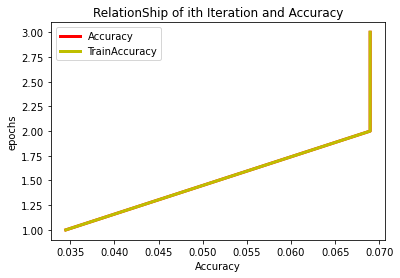

In [66]:
plt.plot(Accu, ith, c = 'r', lw = 3,label='Accuracy' )
plt.plot(TAccu, ith, c = 'y',lw = 3, label = "TrainAccuracy")
plt.title("RelationShip of ith Iteration and Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("epochs")
plt.legend()
plt.show()


# Ploting Error

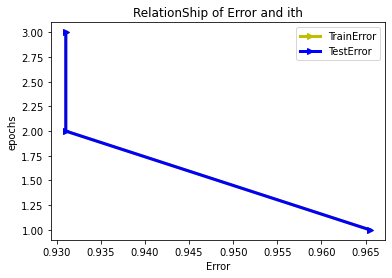

In [67]:
plt.plot(TErr, ith, c = 'y',lw = 3, label = "TrainError", marker = ">")
plt.plot(Err, ith, c = 'b',lw = 3, label = "TestError", marker = ">")
plt.title("RelationShip of Error and ith")
plt.xlabel("Error")
plt.ylabel("epochs")
plt.legend()
plt.show()

SyntaxError: cannot assign to function call (<ipython-input-73-cf9f55f22c4f>, line 1)